In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

### Import Files

In [2]:
customers = pd.read_csv("dataset/customers.csv")
purchases = pd.read_csv("dataset/purchases.csv")

### Data description

In [3]:
customers.head()

,customer_id,signup_date,last_purchase_date
0,1,2020-08-07 17:19:21.301080,2022-12-07 17:19:21.301080
1,2,2019-09-09 17:19:21.306459,2021-04-08 17:19:21.306459
2,3,2021-04-30 17:19:21.306478,2021-07-13 17:19:21.306478
3,4,2020-02-21 17:19:21.306481,2021-04-30 17:19:21.306481
4,5,2020-08-03 17:19:21.306484,2020-11-13 17:19:21.306484


In [4]:
purchases.head()

,purchase_id,customer_id,item,amount
0,1,135,Pulsa GiffGaff,364000.0
1,2,326,Pulsa GiffGaff,167000.0
2,3,668,Payment PLN,85000.0
3,4,719,Topup E-money,429000.0
4,5,772,Pulsa GiffGaff,277000.0


In [5]:
customers.describe()

,customer_id
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [6]:
purchases.describe()

,purchase_id,customer_id,amount
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,504.562400,251067.600000
std,1443.520003,289.353633,143698.679508
min,1.000000,1.000000,1000.000000
25%,1250.750000,257.000000,122000.000000
50%,2500.500000,506.000000,253500.000000
75%,3750.250000,758.000000,373000.000000
max,5000.000000,1000.000000,500000.000000


There are a total of 5000 unique purchases and 1000 unique customers from the data. 

In [7]:
customers.dtypes

customer_id            int64
signup_date           object
last_purchase_date    object
dtype: object

`signup_date` and `last_purchase_date` needed to be changed into datetime.

### 1. Write a Python script to calculate the average time (in days) between the signup date and last purchase date for all customers.

`signup_date` and `last_purchase_date` needed to be converted first to datetime data type so we could calculate the time_diff in days.

In [8]:
customers = customers.astype({'last_purchase_date': np.datetime64, 'signup_date': np.datetime64})
customers.dtypes

customer_id                    int64
signup_date           datetime64[ns]
last_purchase_date    datetime64[ns]
dtype: object

In [9]:
customers["time_diff"] = customers["last_purchase_date"] - customers["signup_date"]
customers

,customer_id,signup_date,last_purchase_date,time_diff
0,1,2020-08-07 17:19:21.301080,2022-12-07 17:19:21.301080,852 days
1,2,2019-09-09 17:19:21.306459,2021-04-08 17:19:21.306459,577 days
2,3,2021-04-30 17:19:21.306478,2021-07-13 17:19:21.306478,74 days
3,4,2020-02-21 17:19:21.306481,2021-04-30 17:19:21.306481,434 days
4,5,2020-08-03 17:19:21.306484,2020-11-13 17:19:21.306484,102 days
...,...,...,...,...
995,996,2022-08-03 17:19:21.308892,2022-11-27 17:19:21.308892,116 days
996,997,2021-12-23 17:19:21.308894,2023-01-12 17:19:21.308894,385 days
997,998,2021-08-02 17:19:21.308896,2022-07-11 17:19:21.308896,343 days
998,999,2020-01-20 17:19:21.308898,2021-08-25 17:19:21.308898,583 days


In [10]:
customers["time_diff"].mean()

Timedelta('474 days 23:12:28.800000')

Average customer has **474 days** between sign up date and last purchase date.

### 2. Using Python, identify any customers who have not made a purchase in the last 90 days and create a list of these customers. Also, suggest a specific product for them to be applied promos to.

In [11]:
# Customers who have not made a purchase in the last 90 days
customer_no_90 = customers[customers['last_purchase_date'] <= (datetime.today() + timedelta(days=-90))]
customer_no_90

,customer_id,signup_date,last_purchase_date,time_diff
0,1,2020-08-07 17:19:21.301080,2022-12-07 17:19:21.301080,852 days
1,2,2019-09-09 17:19:21.306459,2021-04-08 17:19:21.306459,577 days
2,3,2021-04-30 17:19:21.306478,2021-07-13 17:19:21.306478,74 days
3,4,2020-02-21 17:19:21.306481,2021-04-30 17:19:21.306481,434 days
4,5,2020-08-03 17:19:21.306484,2020-11-13 17:19:21.306484,102 days
...,...,...,...,...
995,996,2022-08-03 17:19:21.308892,2022-11-27 17:19:21.308892,116 days
996,997,2021-12-23 17:19:21.308894,2023-01-12 17:19:21.308894,385 days
997,998,2021-08-02 17:19:21.308896,2022-07-11 17:19:21.308896,343 days
998,999,2020-01-20 17:19:21.308898,2021-08-25 17:19:21.308898,583 days


The total number of customers who have not made any purchases at all in the last 90 days is found in the DataFrame `customer_no_90`, which contains a list of 824 customers identified by their customer IDs.

Let's find the recommendation item for each customer based on their history of purchases. Usually, this task called by **recommendation system**. There are already many approaches to create recommendation system. We can do the the most simple and generic methods, such as content based and collaborative filtering method. Other more advanced methods could be done if we have more information regarding the purchases and customers, or perhaps more products, such as customer segmentation (give the same recommendation for customers in the same segment), link prediction (predict potential buying by existing purchase history), and sequential pattern (focus on sequence of historical purchases of the customers).

In [12]:
# Suggestion
purchases['item'].value_counts()

Pulsa GiffGaff    1298
Topup E-money     1265
Payment PDAM      1235
Payment PLN       1202
Name: item, dtype: int64

There are 4 kinds of items that provided in the data. But there are no information of the items charactersitics, so we can't do the content-based method, but we will do the collaborative filtering instead. Collaborative filtering method is a method that will recommend a customer that is already purchased another similar item with another user, and it will check other items that another user also buy. For example, customer 1 is already bought Payment PLN before, which is already purchased too by customer 2. So, the system will look for other items that has been purchased by customer 2, such as Topup E-money, and recommend it to customer 1. On the other hand, the system will look for other items that has been purchased by customer 1, such as Pulsa GiffGaff, and recommend it to customer 2. 

To do that, we pivot the table and detailing how many purchases that a customer has been done for each item.

In [13]:
purchase_pivoted = pd.pivot_table(purchases, values='purchase_id', index='customer_id', columns='item', aggfunc='count', fill_value=0)

# Reset the index to match your desired output
purchase_pivoted = purchase_pivoted.reset_index()

# Rename the columns
purchase_pivoted.columns.name = None
purchase_pivoted.columns = ['customer_id','Payment PDAM','Payment PLN', 'Pulsa GiffGaff','Topup E-money']

# Display the resulting DataFrame
purchase_pivoted

,customer_id,Payment PDAM,Payment PLN,Pulsa GiffGaff,Topup E-money
0,1,0,1,5,0
1,2,0,1,0,2
2,3,2,2,0,1
3,4,1,0,0,0
4,5,5,3,0,3
...,...,...,...,...,...
989,996,1,1,0,1
990,997,1,0,4,0
991,998,2,2,2,5
992,999,1,2,2,2


To simplify the solution, we summarize the purchase customers that has bought of each item, and determine that the second number of purchases is the item that we will recommend to customers that is already bought a particular item.

In [14]:
purchase_pivoted[purchase_pivoted[ 'Pulsa GiffGaff'] >= 1].sum()

customer_id       362016
Payment PDAM         878
Payment PLN          874
Pulsa GiffGaff      1298
Topup E-money        911
dtype: int64

For example, for customers that already bought **Pulsa GiffGaff** before, will be recommended **Topup E-money** since it is the second best purchased product by the users by 911 orders.

In [15]:
purchase_pivoted[purchase_pivoted[ 'Payment PLN'] >= 1].sum()

customer_id       356529
Payment PDAM         875
Payment PLN         1202
Pulsa GiffGaff       936
Topup E-money        912
dtype: int64

For customers that already bought **Payment PLN** before, will be recommended **Pulsa GiffGaff** since it is the second best purchased product by the users by 936 orders.

In [16]:
purchase_pivoted[purchase_pivoted[ 'Payment PDAM'] >= 1].sum()

customer_id       360631
Payment PDAM        1235
Payment PLN          862
Pulsa GiffGaff       918
Topup E-money        866
dtype: int64

For customers that already bought **Payment PDAM** before, will be recommended **Pulsa GiffGaff** since it is the second best purchased product by the users by 918 orders.

In [17]:
purchase_pivoted[purchase_pivoted[ 'Topup E-money'] >= 1].sum()

customer_id       354659
Payment PDAM         851
Payment PLN          886
Pulsa GiffGaff       899
Topup E-money       1265
dtype: int64

For customers that already bought **Topup E-money** before, will be recommended **Pulsa GiffGaff** since it is the second best purchased product by the users by 899 orders.

Since the solution is too general, in the future we could extend it by considering the combination of 2 kinds of items instead if just condidering 1 items. 

Sequential pattern also could be considered in recommendation system since there are possibiliities that buying 1 item is leading into buying other particular item or similar item that is called "causal effect".

Also, other methods is possible to be done if there are additional of information or columns.

### 3. Using Python, show us a graph on the buying tendency of customers depending on the month they signed up. Make it as informative as possible.

By looking at the correlation betweeen join month and purchase count, it doesn't seem that both of these informations are correlated. Let's see if we break down the purchase count by per item type.

In [18]:
# Add join month info
customers['join_month_year'] = customers['signup_date'].dt.to_period('M')
customers['join_quarter_year'] = customers['signup_date'].dt.to_period('Q')

In [19]:
# Count how many times purchases per customer 
purchases_per_customer = purchases.groupby('customer_id').count().reset_index()
purchases_per_customer = purchases_per_customer[['customer_id','purchase_id']].rename(columns={'purchase_id':'count_purchases'})
purchases_per_customer = pd.merge(purchases_per_customer, customers[['customer_id','join_month_year','join_quarter_year']], on='customer_id', how='inner')
purchases_per_customer

,customer_id,count_purchases,join_month_year,join_quarter_year
0,1,6,2020-08,2020Q3
1,2,3,2019-09,2019Q3
2,3,5,2021-04,2021Q2
3,4,1,2020-02,2020Q1
4,5,11,2020-08,2020Q3
...,...,...,...,...
989,996,3,2022-08,2022Q3
990,997,5,2021-12,2021Q4
991,998,11,2021-08,2021Q3
992,999,7,2020-01,2020Q1


In [20]:
# Group by 'join_month_year' or 'join_quarter_year' and calculate the sum of 'count_purchases'
monthly_purchases = purchases_per_customer.groupby('join_month_year')['count_purchases'].sum()
quarterly_purchases = purchases_per_customer.groupby('join_quarter_year')['count_purchases'].sum()

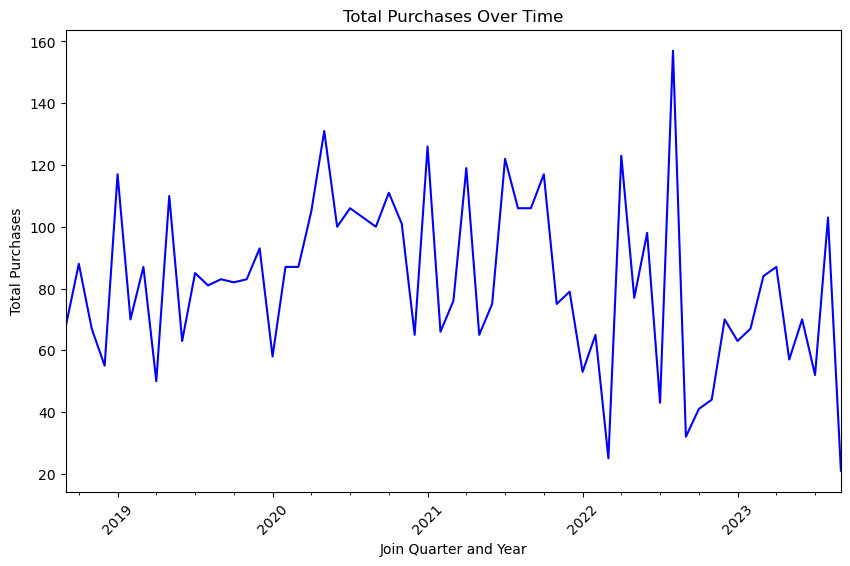

In [21]:
# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_purchases.plot(kind='line', color='blue')
# Customize the plot
plt.xlabel('Join Month and Year')
plt.ylabel('Total Purchases')
plt.title('Total Purchases Per Month Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
# plt.tight_layout()
plt.show()

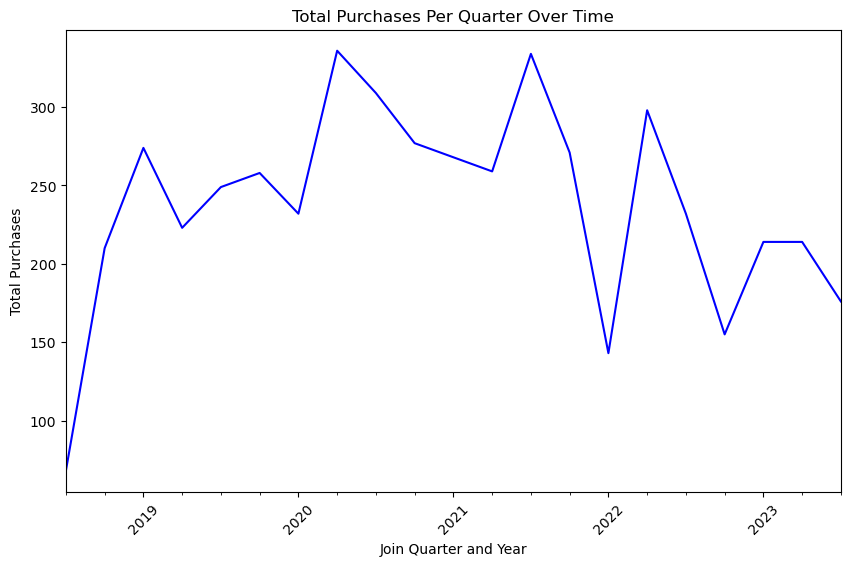

In [27]:
# Create a bar plot
plt.figure(figsize=(10, 6))
quarterly_purchases.plot(kind='line', color='blue')
# Customize the plot
plt.xlabel('Join Quarter and Year')
plt.ylabel('Total Purchases')
plt.title('Total Purchases Per Quarter Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
# plt.tight_layout()
plt.show()

On Q1 and Q4 2022, total purchases is down to 150. Peak purchases number is on Q2 2020 and Q3 2021.

In [23]:
purchase_pivoted = pd.merge(purchase_pivoted, customers[['customer_id','join_month_year', 'join_quarter_year']], on='customer_id', how='inner')
purchase_pivoted

,customer_id,Payment PDAM,Payment PLN,Pulsa GiffGaff,Topup E-money,join_month_year,join_quarter_year
0,1,0,1,5,0,2020-08,2020Q3
1,2,0,1,0,2,2019-09,2019Q3
2,3,2,2,0,1,2021-04,2021Q2
3,4,1,0,0,0,2020-02,2020Q1
4,5,5,3,0,3,2020-08,2020Q3
...,...,...,...,...,...,...,...
989,996,1,1,0,1,2022-08,2022Q3
990,997,1,0,4,0,2021-12,2021Q4
991,998,2,2,2,5,2021-08,2021Q3
992,999,1,2,2,2,2020-01,2020Q1


<Figure size 1000x600 with 0 Axes>

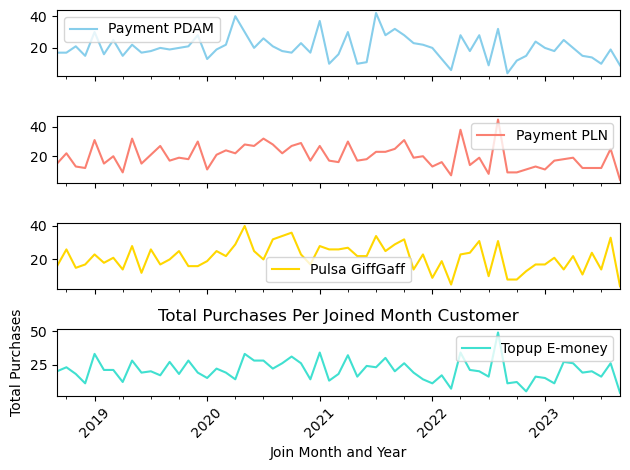

In [28]:
# Group by 'join_month_year' and calculate the sum of 'count_purchases' per item
month_yearly_purchases = purchase_pivoted.groupby('join_month_year')[['Payment PDAM','Payment PLN','Pulsa GiffGaff','Topup E-money']].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
month_yearly_purchases.plot(subplots=True, kind='line', color=['skyblue','salmon','gold','turquoise'])


# Customize the plot
plt.xlabel('Join Month and Year')
plt.ylabel('Total Purchases')
plt.title('Total Purchases Per Joined Month Customer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

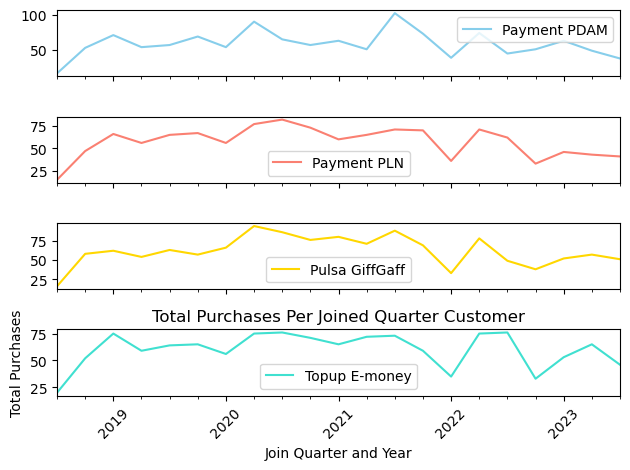

In [29]:
# Group by 'join_month_year' and calculate the sum of 'count_purchases' per item
quarter_yearly_purchases = purchase_pivoted.groupby('join_quarter_year')[['Payment PDAM','Payment PLN','Pulsa GiffGaff','Topup E-money']].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
quarter_yearly_purchases.plot(subplots=True, kind='line', color=['skyblue','salmon','gold','turquoise'])


# Customize the plot
plt.xlabel('Join Quarter and Year')
plt.ylabel('Total Purchases')
plt.title('Total Purchases Per Joined Quarter Customer')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

Customers that joined in August 2022 tends to purchase our products the most, especially for item Payment PLN and Topup E-money. On the other hand, customers that joined on March 2022 has the least total amount purchases. We need more data to investigate what is the characteristic of these segment of customers. We could also investigate the average purchase of each customers that joined that month. 

For these customers that had low average number of purchases, we can offer a special discount or promo at each their joined anniversary to increase their potential purchases in the future, especially if we have membership points system so customers needed to go back to use our product to use their points. 

For future research, we could see the causal effects of promotion to purchases if we have the information. These financial products are mostly like to be repurchased by customer, so we need to make sure to increase the return rate. If we had the admin fee information, it would be a great additional information to calculate the nett revenue or profit.